# Enrique vs Guardiola:
#### A passing network visualization analysis of the 2 Barca teams that won the UCL under different managers

In [2]:
import pandas as pd
import numpy as np
import mplsoccer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mplsoccer import Pitch, Sbopen
from statsbombpy import sb

In [3]:
parser = Sbopen(dataframe=True)

In [4]:
comps = sb.competitions()
comps = comps.loc[comps['competition_name'] == 'Champions League'].head(10)
comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
7,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
8,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
9,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
10,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [5]:
# Merging all matches into one dataframe, filtering to only Barca games
df = pd.DataFrame()
for i in comps['season_id']:
    df = df.append(sb.matches(competition_id = 16, season_id = i))
df = df.loc[(df['home_team'] == 'Barcelona') | (df['away_team'] == 'Barcelona')]

In [6]:
df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18242,2015-06-06,20:45:00.000,Europe - Champions League,2014/2015,Juventus,Barcelona,1,3,available,...,2021-06-13T16:17:31.694,1,Final,Olympiastadion Berlin,Cüneyt Çakιr,Massimiliano Allegri,Luis Enrique Martínez García,1.0.3,None,None
0,18236,2011-05-28,20:45:00.000,Europe - Champions League,2010/2011,Barcelona,Manchester United,3,1,available,...,2021-06-13T16:17:31.694,1,Final,Wembley Stadium,Viktor Kassai,Josep Guardiola i Sala,Alex Ferguson,1.0.3,None,None


In [7]:
df, related, freeze, tactics = parser.event(18242)
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Barcelona"].iloc[0]["index"]
#make df with successfull passes by Barca until the first substitution
barca = (df.type_name == 'Pass') & (df.team_name == "Barcelona") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
df_pass = df.loc[barca, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
25,30.0,66.0,39.0,71.0,Gerard Piqué Bernabéu,Daniel Alves da Silva
27,39.0,71.0,40.0,64.0,Daniel Alves da Silva,Sergio Busquets i Burgos
29,40.0,64.0,43.0,73.0,Sergio Busquets i Burgos,Daniel Alves da Silva
33,44.0,73.0,49.0,74.0,Daniel Alves da Silva,Ivan Rakitić
39,43.0,76.0,16.0,66.0,Daniel Alves da Silva,Gerard Piqué Bernabéu
...,...,...,...,...,...,...
2841,38.0,16.0,75.0,4.0,Javier Alejandro Mascherano,Neymar da Silva Santos Junior
2859,76.0,33.0,91.0,46.0,Javier Alejandro Mascherano,Lionel Andrés Messi Cuccittini
2897,86.0,36.0,108.0,24.0,Neymar da Silva Santos Junior,Jordi Alba Ramos
2901,105.0,25.0,99.0,30.0,Jordi Alba Ramos,Neymar da Silva Santos Junior


In [8]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #Taking average player positions through passing and reception average coordinates
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1000)

In [9]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

In [10]:
# For the 2011 UCL Final Match
df2, related, freeze, tactics = parser.event(18236)
sub = df2.loc[df2["type_name"] == "Substitution"].loc[df2["team_name"] == "Barcelona"].iloc[0]["index"]
barca = (df2.type_name == 'Pass') & (df2.team_name == "Barcelona") & (df2.index < sub) & (df2.outcome_name.isnull()) & (df2.sub_type_name != "Throw-in")
df2_pass = df2.loc[barca, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]


scatter_df2 = pd.DataFrame()
for i, name in enumerate(df2_pass["player_name"].unique()):
    passx2 = df2_pass.loc[df2_pass["player_name"] == name]["x"].to_numpy()
    recx2 = df2_pass.loc[df2_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy2 = df2_pass.loc[df2_pass["player_name"] == name]["y"].to_numpy()
    recy2 = df2_pass.loc[df2_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df2.at[i, "player_name"] = name
    #Taking average player positions through passing and reception average coordinates
    scatter_df2.at[i, "x"] = np.mean(np.concatenate([passx2, recx2]))
    scatter_df2.at[i, "y"] = np.mean(np.concatenate([passy2, recy2]))
    #calculate number of passes
    scatter_df2.at[i, "no"] = df2_pass.loc[df2_pass["player_name"] == name].count().iloc[0]

scatter_df2['marker_size'] = (scatter_df2['no'] / scatter_df2['no'].max() * 1000)

df2_pass["pair_key"] = df2_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df2 = df2_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df2.rename({'x':'pass_count'}, axis='columns', inplace=True)
lines_df2 = lines_df2[lines_df2['pass_count']>2]

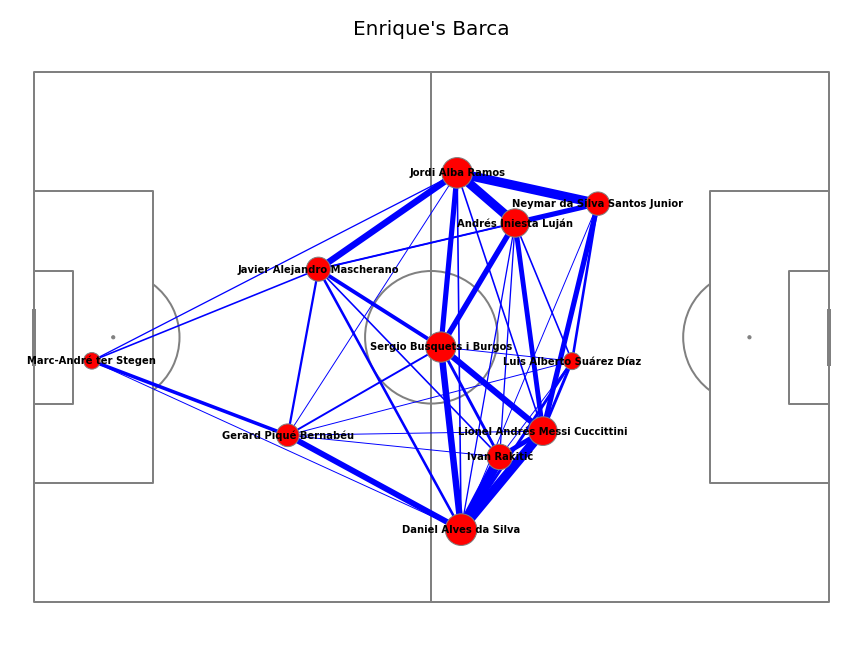

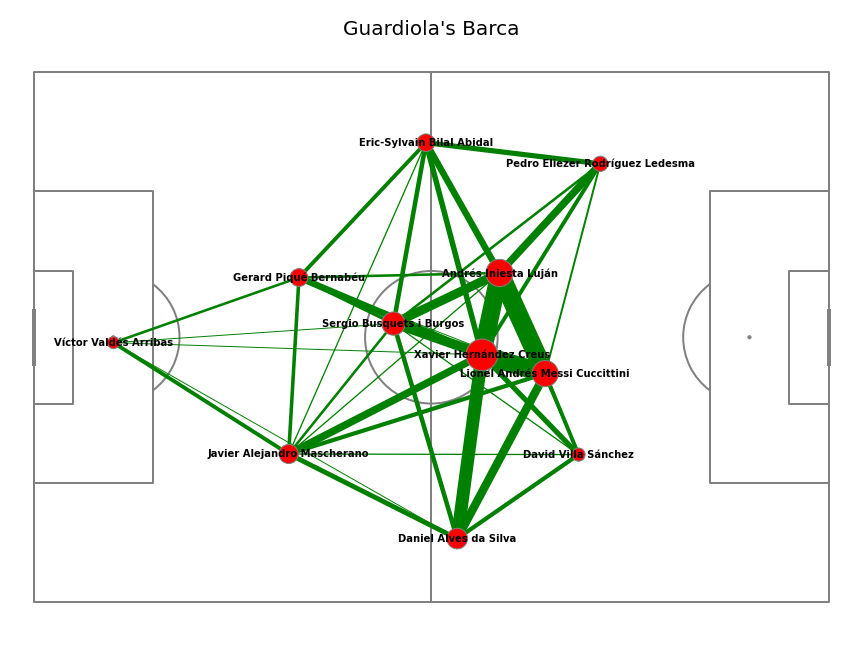

In [11]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=10, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="blue", ax = ax["pitch"])
plt.suptitle("Enrique's Barca", fontsize = 20)
plt.show()

# Repeating the same process for Guardiola's Barca
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df2.x, scatter_df2.y, s=scatter_df2.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df2.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=10, ax=ax["pitch"], zorder = 4)

for i, row in lines_df2.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        player1_x = scatter_df2.loc[scatter_df2["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df2.loc[scatter_df2["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df2.loc[scatter_df2["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df2.loc[scatter_df2["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="green", ax = ax["pitch"])
plt.suptitle("Guardiola's Barca", fontsize = 20)

plt.show()

## <u>Observations and Analysis</u>

### Dominant Passing Regions
During Guardiola's time, the midfield was the greatest feature of the team. The play revolved around the technically brilliant Messi-Iniesta-Xavi trio. 

However, during Enrique's time, due to the aging of the midfield and the presence of the MSN trio, the focus was much more on getting the ball up to the forwards as fast as possible, and letting them create chances

In [22]:
pd.DataFrame(df_pass.groupby(['pair_key']).size().sort_values(ascending=False).head(5)).rename({0:'pass_count'}, axis='columns')

,pass_count
pair_key,
Daniel Alves da Silva_Ivan Rakitić,31
Daniel Alves da Silva_Lionel Andrés Messi Cuccittini,29
Jordi Alba Ramos_Neymar da Silva Santos Junior,29
Andrés Iniesta Luján_Jordi Alba Ramos,28
Javier Alejandro Mascherano_Jordi Alba Ramos,20


In [23]:
pd.DataFrame(df2_pass.groupby(['pair_key']).size().sort_values(ascending=False).head(5)).rename({0:'pass_count'}, axis='columns')

,pass_count
pair_key,
Andrés Iniesta Luján_Lionel Andrés Messi Cuccittini,59
Lionel Andrés Messi Cuccittini_Xavier Hernández Creus,57
Andrés Iniesta Luján_Xavier Hernández Creus,56
Daniel Alves da Silva_Xavier Hernández Creus,40
Andrés Iniesta Luján_Sergio Busquets i Burgos,28


This observation is also evident in the passing networks. Guardiola's Barca's heaviest links are in the central regions between **Messi and the midfield. This is where you'll see the passing triangles form.**

However, with Enrique, **the triangles were between the winger, fullback, and the number 8 on either side (Rakitic and Iniesta)**

### Goalkeeper Passing

Notice how Valdes only plays to Busquets or the centre-backs. This was a characteristic trait of Guardiola's buildup. However in Enrique's system, due to the focus on quick vertical progression, Ter Stegen has the freedom to play to fullbacks and directly into the striker/winger too

### Messi & Busquets: Two Pillars of Barca Buildup Play
Almost 5 years apart for the 2 visualizations, two things remain constant:
1. ***EVERYTHING*** goes through Sergio Busquets. The pivot receives the ball from the centre backs, uses that slick disguised pass to progress the ball to the forwards/8's, and circulates possession. Moreover, he acts as a release valve being a passing option for everyone. Look at his connectivity across the pitch in the network map.
2. Messi. Through both eras, his link up play with the midfielders, forward line, and Dani Alves in particular formed the engine of the Barca offensive game. The man was 